In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# check mouse df for any nulls
mouse_df.isnull().any().any()

False

In [4]:
# check trial df for any nulls
trial_df.isnull().any().any()

False

In [5]:
# Combine the data into a single dataset
merge_df = pd.merge(trial_df, mouse_df, on="Mouse ID", how="inner")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# create a smaller df with just the columns we need
vol_df = merge_df.loc[:,['Drug','Timepoint','Tumor Volume (mm3)']]

# create group by object to get the tumor volume avg
vol_mean_group = vol_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
vol_mean_df = pd.DataFrame(vol_mean_group)

#rename the tumor volume to something more appropriate
vol_mean_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Avg'},inplace = True)

# Preview DataFrame
vol_mean_df


Tumor Volume Avg
Drug      Timepoint                  
Capomulin 0                 45.000000
          5                 44.266086
          10                43.084291
          15                42.064317
          20                40.716325
...                               ...
Zoniferol 25                55.432935
          30                57.713531
          35                60.089372
          40                62.916692
          45                65.960888

[100 rows x 1 columns]

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#using the same df I used to get the mean volume
serr = vol_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
serr_df = pd.DataFrame(serr)

#rename the standard error column
serr_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume StdError'},inplace = True)

# Preview DataFrame
serr_df.head()


Tumor Volume StdError
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.448593
          10                      0.702684
          15                      0.838617
          20                      0.909731

In [8]:
# Minor Data Munging to Re-Format the Data Frames

# pivot for a 2 index df using "unstack": https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html
tumor_pivot = vol_mean_df.unstack(0)

tumor_data_df = tumor_pivot['Tumor Volume Avg']

# Preview that Reformatting worked
tumor_data_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


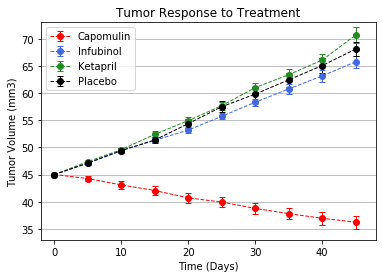

In [9]:
# Generate the Plot (with Error Bars)
# x axis, using numpy a-range to create the series 0-45, by fives)
x_axis = np.arange(0,50,5) 

#make each series
error = serr_df['Tumor Volume StdError']['Capomulin']
capomulin_series = plt.errorbar(
    x_axis, 
    tumor_data_df['Capomulin'], 
    yerr=error, 
    fmt='o', 
    ls='dashed', 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ='red',
    label = 'Capomulin'
)

error = serr_df['Tumor Volume StdError']['Infubinol']
infubinol_series = plt.errorbar(
    x_axis, 
    tumor_data_df['Infubinol'], 
    yerr=error, 
    fmt='o', 
    ls='dashed', 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ='royalblue',
    label = 'Infubinol'
)

error = serr_df['Tumor Volume StdError']['Ketapril']
ketapril_series = plt.errorbar(
    x_axis, 
    tumor_data_df['Ketapril'], 
    yerr=error, fmt='o', 
    ls='dashed', 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ='forestgreen',
    label='Ketapril'
)

error = serr_df['Tumor Volume StdError']['Placebo']
placebo_series = plt.errorbar(
    x_axis, 
    tumor_data_df['Placebo'], 
    yerr=error, 
    fmt='o', 
    ls='dashed', 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ='black',
    label='Placebo'
)

# set the axis limits
plt.xlim(-2,48)
plt.ylim(33, 73)

# titles and axis labels
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

# only horizontal lines to match the example chart
plt.grid(axis='y')

# legend
plt.legend(loc='best')

# Save the Figure
plt.savefig('../Images/treatment.png')


## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# narrow down data set to relevant columns
meta_subset = merge_df.loc[:,['Timepoint','Drug','Metastatic Sites']]

meta_group = meta_subset.groupby(['Drug','Timepoint']).mean()

# Convert to DataFrame
meta_avg_df = pd.DataFrame(meta_group)

#rename measure
meta_avg_df.rename(columns={'Metastatic Sites': 'Metastatic Sites Avg'},inplace = True)

# Preview DataFrame
meta_avg_df.head()


Metastatic Sites Avg
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.160000
          10                     0.320000
          15                     0.375000
          20                     0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# use the same group by object, make a dataframe in 1 step
meta_err_df = meta_subset.groupby(['Drug','Timepoint']).sem()

# rename standard error column
meta_err_df.rename(columns={'Metastatic Sites': 'Metastatic Sites StdErr'}, inplace=True)

# type(meta_err_df)

# preview data frame
meta_err_df.head()



Metastatic Sites StdErr
Drug      Timepoint                         
Capomulin 0                         0.000000
          5                         0.074833
          10                        0.125433
          15                        0.132048
          20                        0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames


# pivot data using unstack
meta_pivot = meta_avg_df.unstack(0)

meta_data_df = meta_pivot['Metastatic Sites Avg']

# Preview that Reformatting worked
meta_data_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


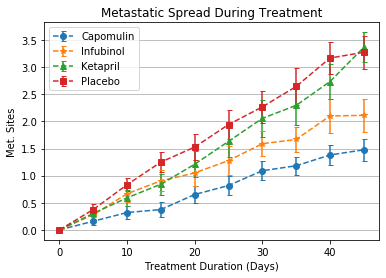

In [13]:
# Generate the plot with error bars
plt.errorbar(
    np.arange(0,50,5),
    meta_avg_df.loc['Capomulin', 'Metastatic Sites Avg'],
    yerr = meta_err_df.loc['Capomulin', 'Metastatic Sites StdErr'],
    fmt = '--o',
    capsize = 2.5,
    label = 'Capomulin'
)
plt.errorbar(
    np.arange(0,50,5),
    meta_avg_df.loc['Infubinol', 'Metastatic Sites Avg'],
    yerr = meta_err_df.loc['Infubinol', 'Metastatic Sites StdErr'],    
    fmt = '--*',
    capsize = 2.5,
    label = 'Infubinol'
)
plt.errorbar(
    np.arange(0,50,5),
    meta_avg_df.loc['Ketapril', 'Metastatic Sites Avg'],
    yerr = meta_err_df.loc['Ketapril', 'Metastatic Sites StdErr'],    
    fmt = '--^',
    capsize = 2.5,
    label = 'Ketapril'
)
plt.errorbar(
    np.arange(0,50,5),
    meta_avg_df.loc['Placebo', 'Metastatic Sites Avg'],
    yerr = meta_err_df.loc['Placebo', 'Metastatic Sites StdErr'],    
    fmt = '--s',
    capsize = 2.5,
    label = 'Placebo'
)

# add the labels stuff
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(loc='best')
plt.grid(axis='y')

# save the chart
plt.savefig('../Images/spread.png')

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# can't use the previous group by object since we need mouse id
mouse_group = merge_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
mouse_count_df = mouse_group[['Mouse ID']].count().rename(columns={'Mouse ID': 'Mouse Count'})

# Preview DataFrame
mouse_count_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
# Minor Data Munging to Re-Format the Data Frames

# pivot the table, measure is mouse count
mouse_pivot = mouse_count_df.unstack(0)
mouse_data_df = mouse_pivot['Mouse Count']

# Preview that Reformatting worked
mouse_data_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


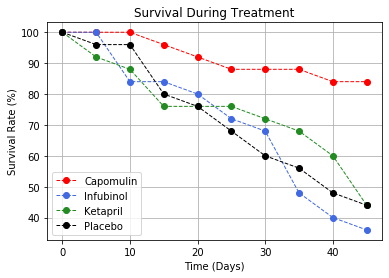

In [16]:
# x-axis
x_axis = np.arange(0,50,5) 

# mouse count (since the 4 drugs we are charting all had 25 mice, i'm hard-coding that variable)
mouse_count = 25

#make each series (dividing the count of mice survived by the # of mice at start, then x 100 to format as %)
capomulin_series = plt.errorbar(
    x_axis, 
    (mouse_data_df["Capomulin"]/mouse_count)*100, 
    fmt="o", 
    ls="dashed", 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ="red",
    label = 'Capomulin'
)

infubinol_series = plt.errorbar(
    x_axis, 
    (mouse_data_df["Infubinol"]/mouse_count)*100, 
    fmt="o", 
    ls="dashed", 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ="royalblue",
    label = 'Infubinol'
)

ketapril_series = plt.errorbar(
    x_axis, 
    (mouse_data_df["Ketapril"]/mouse_count)*100, 
    fmt="o", 
    ls="dashed", 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ="forestgreen",
    label = 'Ketapril'
)

placebo_series = plt.errorbar(
    x_axis, 
    (mouse_data_df["Placebo"]/mouse_count)*100, 
    fmt="o", 
    ls="dashed", 
    linewidth=1, 
    alpha=1, 
    capsize=3,
    color ="black",
    label = 'Placebo'
)

# titles and axis labels
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.legend(loc='best')

# Save the Figure
plt.savefig('../Images/survival.png')


## Summary Bar Graph

In [28]:
# get the last timepoint
tp_max = merge_df['Timepoint'].max()

# calculate the % change by drug, using or already pivoted df for tumor volume
capomulin_change = ((tumor_data_df['Capomulin'][tp_max] - tumor_data_df['Capomulin'][0])/tp_max)*100
infubinol_change = ((tumor_data_df['Infubinol'][tp_max] - tumor_data_df['Infubinol'][0])/tp_max)*100
ketapril_change = ((tumor_data_df['Ketapril'][tp_max] - tumor_data_df['Ketapril'][0])/tp_max)*100
placebo_change = ((tumor_data_df['Placebo'][tp_max] - tumor_data_df['Placebo'][0])/tp_max)*100

drugs = ['Capomulin', 'Infubinol','Ketapril','Placebo']
changes = [capomulin_change, infubinol_change, ketapril_change, placebo_change]

drug_change_df = pd.DataFrame({
    'Drug': drugs,
    'Percent Change': changes
})

drug_change_df.head()


,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


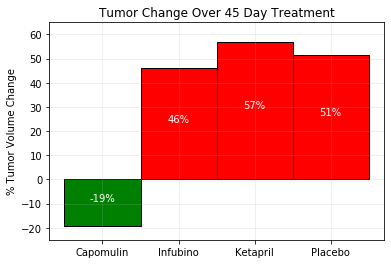

In [55]:
# function to label bars
def labelBars(bars, cols):
    (y_bottom, y_top) = cols.get_ylim()
    y_height = y_top - y_bottom
    
    for bar in bars:
        bar_height = bar.get_height()
        # center the label position (bar_height / 2)
        label_position = bar_height / 2
        
        cols.text(
            bar.get_x() + bar.get_width()/2, 
            label_position, 
            str('%d' % int(bar_height)) + '%',
            ha='center',
            va='bottom', 
            color='w'
        )

# setup for chart
bars, cols = plt.subplots()
xaxis = np.arange(0,4,1)
values = drug_change_df['Percent Change']
labels = ['Capomulin','Infubino','Ketapril','Placebo']

# list to store the colors, green for good, red for bad
colors = []

# loop through the values, assigning the color based on value
for value in values:
    if value < 0:
        colors.append('g')
    else:
        colors.append('r')
        
change_plot = plt.bar(
    xaxis, 
    values, 
    color=colors, 
    tick_label = labels,
    width = 1,
    edgecolor = 'black'
)

# add titles, axis labels,grid and y-limits (x looks ok)
cols.set_title('Tumor Change Over 45 Day Treatment')
cols.set_ylabel('% Tumor Volume Change')
cols.grid(alpha = .25)
cols.set_ylim(-25,65)

# call label function
labelBars(change_plot, cols)

# save image
plt.savefig('../Images/change.png')

    